In [1]:
import qiskit as q

In [4]:
circuit = q.QuantumCircuit(2, 2)  # creating a circuit with 2 qubits & 2 classical bits

# in qiskit, x serves as a not-gate, meaning it flips the value.
# here we pass a 0 as the starting value, so now it is 1.
circuit.x(0)  

# cx is a cnot, or controlled not, which flips the 2nd qubit's value 
# if the first qubit is 1
circuit.cx(0, 1)

# now we need to measure, basically q-compile, the registers
# this converts our qubits back into classical bits.
# ([qbitregister], [classicalbitregister])
circuit.measure([0,1], [0,1])

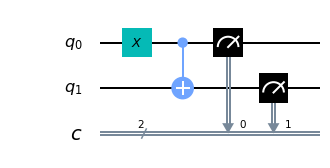

In [28]:
# here you can see the q-circuit that we built in the form of a graph.
circuit.draw(output='mpl')

In [16]:
with open('../ibm_creds', 'r') as file:
    creds = file.read()
    creds = creds.replace('\n', '')
    file.close()

In [17]:
q.IBMQ.save_account(creds)

In [18]:
q.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
q.IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
provider = q.IBMQ.get_provider('ibm-q')

In [23]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 8 queued and 5 qubits
ibmq_16_melbourne has 2 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 10 queued and 5 qubits
ibmq_london has 5 queued and 5 qubits
ibmq_burlington has 5 queued and 5 qubits
ibmq_essex has 6 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [24]:
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [25]:
backend = provider.get_backend('ibmq_16_melbourne')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()
counts = result.get_counts(circuit)

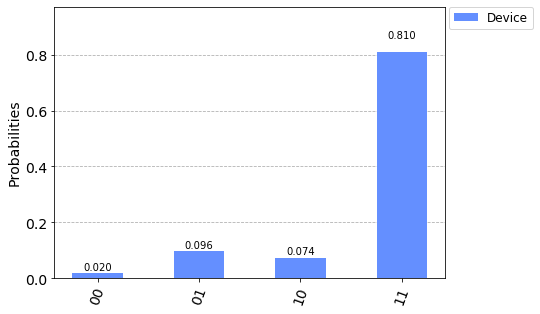

In [27]:
plot_histogram([counts], legend=['Device'])

## Making this harder
utilizing superposition

In [29]:
circuit = q.QuantumCircuit(2,2)

# adding a Hadamard gate, which puts qubit 0 into superposition
circuit.h(0)

# cnot gate, which flips the second qubits value if the first qubit is 1
circuit.cx(0, 1)

circuit.measure([0,1], [0,1])

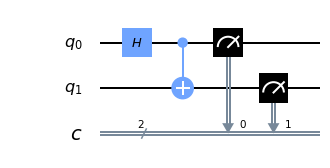

In [30]:
circuit.draw(output='mpl')

In [31]:
backend = provider.get_backend('ibmq_16_melbourne')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


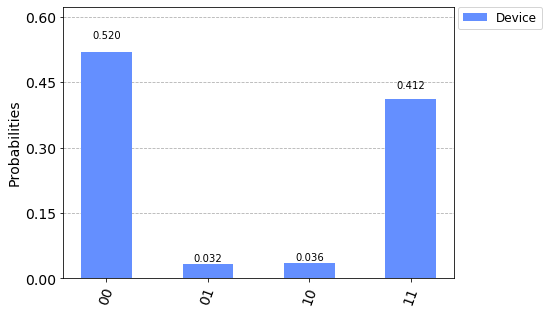

In [32]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts], legend=['Device'])

## Aer, the quantum simulator

Using Aer allows us to use a quantum simulator without bogging down IBMs systems|

In [33]:
from qiskit import Aer

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


`QasmSimulator`: Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory

`StatevectorSimulator`: Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application

`UnitarySimulator`: Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself. Note that the circuit cannot contain measure or reset operations for this backend

`PulseSimulator`: ?

These simulators only simulate a perfect quantum environment. Below we rerun the prior job and only get `00` and `11` results

In [42]:
sim_backend = Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend=sim_backend, shots=10000)
job_monitor(job)

Job Status: job has successfully run


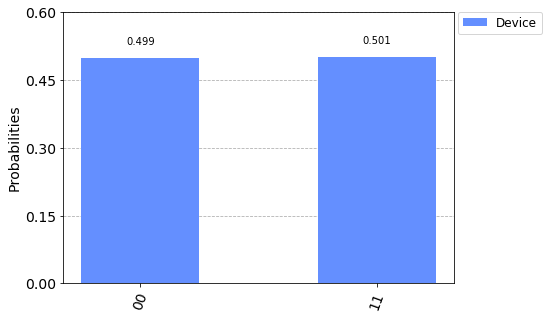

In [43]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts], legend=['Device'])